## **Retroalimentación Módulo 1 de Big Data:**

## **Utilización, procesamiento y visualización de grandes volúmenes de datos (Portafolio Análisis)**



### Kevin Joan Delgado Pérez A01706328

### *Instanciar la sesión de pyspark.*

In [ ]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://downloads.apache.org/spark/spark-3.2.2//spark-3.2.2-bin-hadoop3.2.tgz
!tar xf spark-3.2.2-bin-hadoop3.2.tgz
#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop3.2"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

#Probando PySparl
from pyspark.sql import SparkSession

spark_Evidence = SparkSession \
       .builder \
       .appName("Evidence") \
       .config("spark.driver.memory", "15g") \
       .getOrCreate()

spark_Evidence

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 1s (223 kB/s)
Reading package li

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "/content/gdrive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases"
!ls  # show current directory

/content/gdrive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases
Airlines.csv		       spark-3.2.2-bin-hadoop3.2.tgz.1	us2022q2e.csv
SeoulBikeData.csv	       us2022q2a.csv			usfirms2022.csv
spark-3.2.2-bin-hadoop3.2      us2022q2c.csv
spark-3.2.2-bin-hadoop3.2.tgz  us2022q2d.csv


*Para obtener el dataset, se subió el dataset al Path en el Google Drive seleccionado, al tener nombres columna, se usa el parametro header e indicamos el formato de separador entre columnas (\t indica un tipo de separador de espacio especial).*

*Link del dataset [Skin Segmentation](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation).*

In [ ]:
df = spark_Evidence.read.csv("/content/gdrive/MyDrive/IA_data_sets/Bloque1/Statistics_businessCases/Airlines.csv", header=True, inferSchema=True)
df

DataFrame[id: int, Airline: string, Flight: int, AirportFrom: string, AirportTo: string, DayOfWeek: int, Time: int, Length: int, Delay: int]

*Datos mostrados para verificar su uso.*

In [ ]:
df.show()

+---+-------+------+-----------+---------+---------+----+------+-----+
| id|Airline|Flight|AirportFrom|AirportTo|DayOfWeek|Time|Length|Delay|
+---+-------+------+-----------+---------+---------+----+------+-----+
|  1|     CO|   269|        SFO|      IAH|        3|  15|   205|    1|
|  2|     US|  1558|        PHX|      CLT|        3|  15|   222|    1|
|  3|     AA|  2400|        LAX|      DFW|        3|  20|   165|    1|
|  4|     AA|  2466|        SFO|      DFW|        3|  20|   195|    1|
|  5|     AS|   108|        ANC|      SEA|        3|  30|   202|    0|
|  6|     CO|  1094|        LAX|      IAH|        3|  30|   181|    1|
|  7|     DL|  1768|        LAX|      MSP|        3|  30|   220|    0|
|  8|     DL|  2722|        PHX|      DTW|        3|  30|   228|    0|
|  9|     DL|  2606|        SFO|      MSP|        3|  35|   216|    1|
| 10|     AA|  2538|        LAS|      ORD|        3|  40|   200|    1|
| 11|     CO|   223|        ANC|      SEA|        3|  49|   201|    1|
| 12| 

In [ ]:
df = df.drop('id','Airline','AirportFrom','AirportTo')

In [ ]:
df.show()

+------+---------+----+------+-----+
|Flight|DayOfWeek|Time|Length|Delay|
+------+---------+----+------+-----+
|   269|        3|  15|   205|    1|
|  1558|        3|  15|   222|    1|
|  2400|        3|  20|   165|    1|
|  2466|        3|  20|   195|    1|
|   108|        3|  30|   202|    0|
|  1094|        3|  30|   181|    1|
|  1768|        3|  30|   220|    0|
|  2722|        3|  30|   228|    0|
|  2606|        3|  35|   216|    1|
|  2538|        3|  40|   200|    1|
|   223|        3|  49|   201|    1|
|  1646|        3|  50|   212|    1|
|  2055|        3|  50|   210|    0|
|  2408|        3|  55|   170|    0|
|   132|        3|  55|   215|    0|
|   498|        3|  55|   179|    0|
|    98|        3|  59|   213|    0|
|  1496|        3|  60|   162|    0|
|  1450|        3|  60|   181|    0|
|   507|        3|  75|   167|    0|
+------+---------+----+------+-----+
only showing top 20 rows



*Comprobamos la instancia de los tipos de datos.*

In [ ]:
df.printSchema()

root
 |-- Flight: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Time: integer (nullable = true)
 |-- Length: integer (nullable = true)
 |-- Delay: integer (nullable = true)



In [ ]:
df.show()

+------+---------+----+------+-----+
|Flight|DayOfWeek|Time|Length|Delay|
+------+---------+----+------+-----+
|   269|        3|  15|   205|    1|
|  1558|        3|  15|   222|    1|
|  2400|        3|  20|   165|    1|
|  2466|        3|  20|   195|    1|
|   108|        3|  30|   202|    0|
|  1094|        3|  30|   181|    1|
|  1768|        3|  30|   220|    0|
|  2722|        3|  30|   228|    0|
|  2606|        3|  35|   216|    1|
|  2538|        3|  40|   200|    1|
|   223|        3|  49|   201|    1|
|  1646|        3|  50|   212|    1|
|  2055|        3|  50|   210|    0|
|  2408|        3|  55|   170|    0|
|   132|        3|  55|   215|    0|
|   498|        3|  55|   179|    0|
|    98|        3|  59|   213|    0|
|  1496|        3|  60|   162|    0|
|  1450|        3|  60|   181|    0|
|   507|        3|  75|   167|    0|
+------+---------+----+------+-----+
only showing top 20 rows



In [ ]:
df = df.na.drop()

In [ ]:
df.show()

+------+---------+----+------+-----+
|Flight|DayOfWeek|Time|Length|Delay|
+------+---------+----+------+-----+
|   269|        3|  15|   205|    1|
|  1558|        3|  15|   222|    1|
|  2400|        3|  20|   165|    1|
|  2466|        3|  20|   195|    1|
|   108|        3|  30|   202|    0|
|  1094|        3|  30|   181|    1|
|  1768|        3|  30|   220|    0|
|  2722|        3|  30|   228|    0|
|  2606|        3|  35|   216|    1|
|  2538|        3|  40|   200|    1|
|   223|        3|  49|   201|    1|
|  1646|        3|  50|   212|    1|
|  2055|        3|  50|   210|    0|
|  2408|        3|  55|   170|    0|
|   132|        3|  55|   215|    0|
|   498|        3|  55|   179|    0|
|    98|        3|  59|   213|    0|
|  1496|        3|  60|   162|    0|
|  1450|        3|  60|   181|    0|
|   507|        3|  75|   167|    0|
+------+---------+----+------+-----+
only showing top 20 rows



*Se procede con la preparación de los datos, donde se definen los features para determinar los coeficientes en el modelo y se define el output para general el dataset final.*

In [ ]:
from pyspark.ml.feature import VectorAssembler

cols = ['Flight','DayOfWeek','Time','Length']

assembler = VectorAssembler(
    inputCols=cols,
    outputCol="Features")

transformed = assembler.transform(df)

final_data = transformed.select("features", "Delay")
final_data.show()

+--------------------+-----+
|            features|Delay|
+--------------------+-----+
|[269.0,3.0,15.0,2...|    1|
|[1558.0,3.0,15.0,...|    1|
|[2400.0,3.0,20.0,...|    1|
|[2466.0,3.0,20.0,...|    1|
|[108.0,3.0,30.0,2...|    0|
|[1094.0,3.0,30.0,...|    1|
|[1768.0,3.0,30.0,...|    0|
|[2722.0,3.0,30.0,...|    0|
|[2606.0,3.0,35.0,...|    1|
|[2538.0,3.0,40.0,...|    1|
|[223.0,3.0,49.0,2...|    1|
|[1646.0,3.0,50.0,...|    1|
|[2055.0,3.0,50.0,...|    0|
|[2408.0,3.0,55.0,...|    0|
|[132.0,3.0,55.0,2...|    0|
|[498.0,3.0,55.0,1...|    0|
|[98.0,3.0,59.0,21...|    0|
|[1496.0,3.0,60.0,...|    0|
|[1450.0,3.0,60.0,...|    0|
|[507.0,3.0,75.0,1...|    0|
+--------------------+-----+
only showing top 20 rows



*Se genera el split de datos, según las recomendaciones vistas durante los distintos módulos de aprendizaje, la proporción estándar es de 75% para training y 25% para validation.*

In [ ]:
(df_train, df_test) = final_data.randomSplit([0.80, 0.20], seed=42)

*Se procede con la generación del modelo, al tener un dataset que se centra en la clasificación de categorías se optó por iniciar con una regresión logística, aprovechando sus beneficios de rápido procesamiento.*

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Delay', maxIter=15)
lrModel = lr.fit(df_train)

*Mostramos los resultados de las predicciones a partir del dataframe dedicado al test*

In [ ]:
prediction_result = lrModel.evaluate(df_test)
prediction_result.predictions.show()

/content/spark-3.2.2-bin-hadoop3.2/python/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+-----+--------------------+--------------------+----------+
|            features|Delay|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[1.0,1.0,420.0,60.0]|    1|[0.53921204479494...|[0.63162910024287...|       0.0|
|[1.0,1.0,485.0,18...|    1|[0.31441653072040...|[0.57796291849487...|       0.0|
|[1.0,1.0,485.0,18...|    1|[0.31441653072040...|[0.57796291849487...|       0.0|
|[1.0,1.0,550.0,38...|    0|[0.00441876533590...|[0.50110468953651...|       0.0|
|[1.0,1.0,650.0,31...|    0|[-0.0169503751097...|[0.49576250768007...|       1.0|
|[1.0,2.0,480.0,35...|    0|[0.14643351209855...|[0.53654310256002...|       0.0|
|[1.0,2.0,540.0,35...|    0|[0.08561075948751...|[0.52138962739218...|       0.0|
|[1.0,2.0,595.0,54...|    0|[-0.2144498857465...|[0.44659205226359...|       1.0|
|[1.0,3.0,485.0,18...|    0|[0.37052399570425...|[0.59158558819797...|       0.0|
|[1.0,3.0,485.0,

*Para comprobar la eficiencia del modelo de regresión logística, se obtienen las métricas de precisión y error de pruebas*


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
acc = lrModel.summary.accuracy
acc

0.5716480974576369

In [ ]:
print("Test Error = %g" % (1.0 - acc))

Test Error = 0.428352


# Escoger un tablero de visualización para mostrar los datos

## **El problema consiste en el análisis de retraso que existen en vuelos Nacionales de Estados Unidos, se pretenden tomar medidas para evitar el tráfico en los aeropuertos, pero para ello se necesitan realizar modelos para estimar cuáles tienen mayor índice de problemas de este tipo.**

### **Entre las preguntas de lo que se quiere saber es:**

### - ¿Cuáles Aeropuertos del país son los que tienen mayor cantidad de viajes según el dia de la semana? 

### - ¿Qué aerolíneas suelen tener mayor hpras de retraso según el dia de la semana?

### - ¿Cuáles Aeropuertos tienen más horas de retraso en total?

## *Dado que se tienen muestras del retraso en horas de tiempo en los vuelos, se toma la decisión de mostrar la cantidad de horas de retraso totales que existen por aerolínea, así es posible visualizar a aquellas con más problemas de horas de retraso.*

### *Para visualizar los objetivos que se quieren saber fue necesario cargar los datos a Tableu y hacer las siguientes configuraciones:*



### 1. *Suma de las horas de retraso totales según el Aeropuerto donde sale*

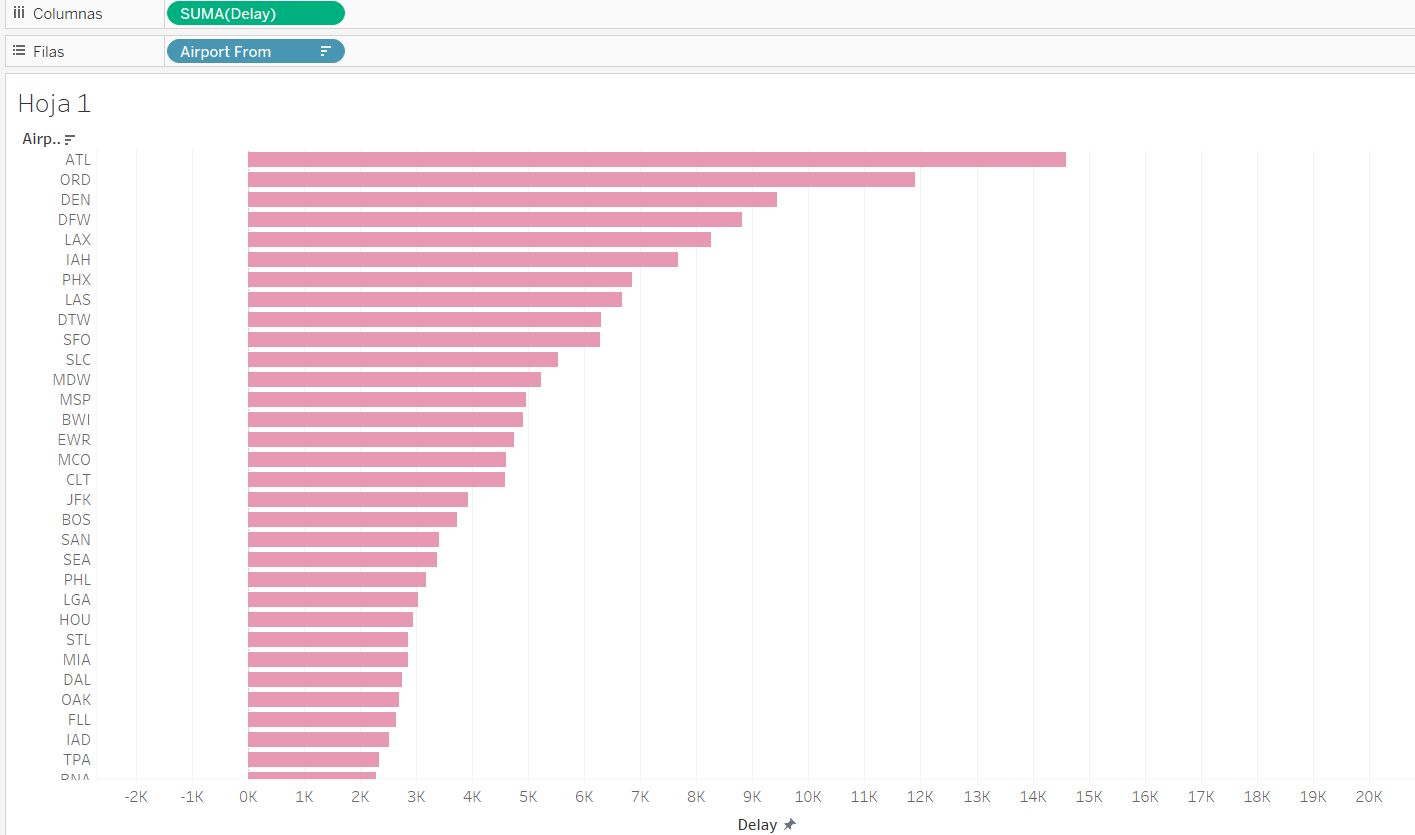

### 2. *Recuento del número de vuelos por aeropuerto según el dia de la semana (1 = Lunes, 7 = Domingo)*

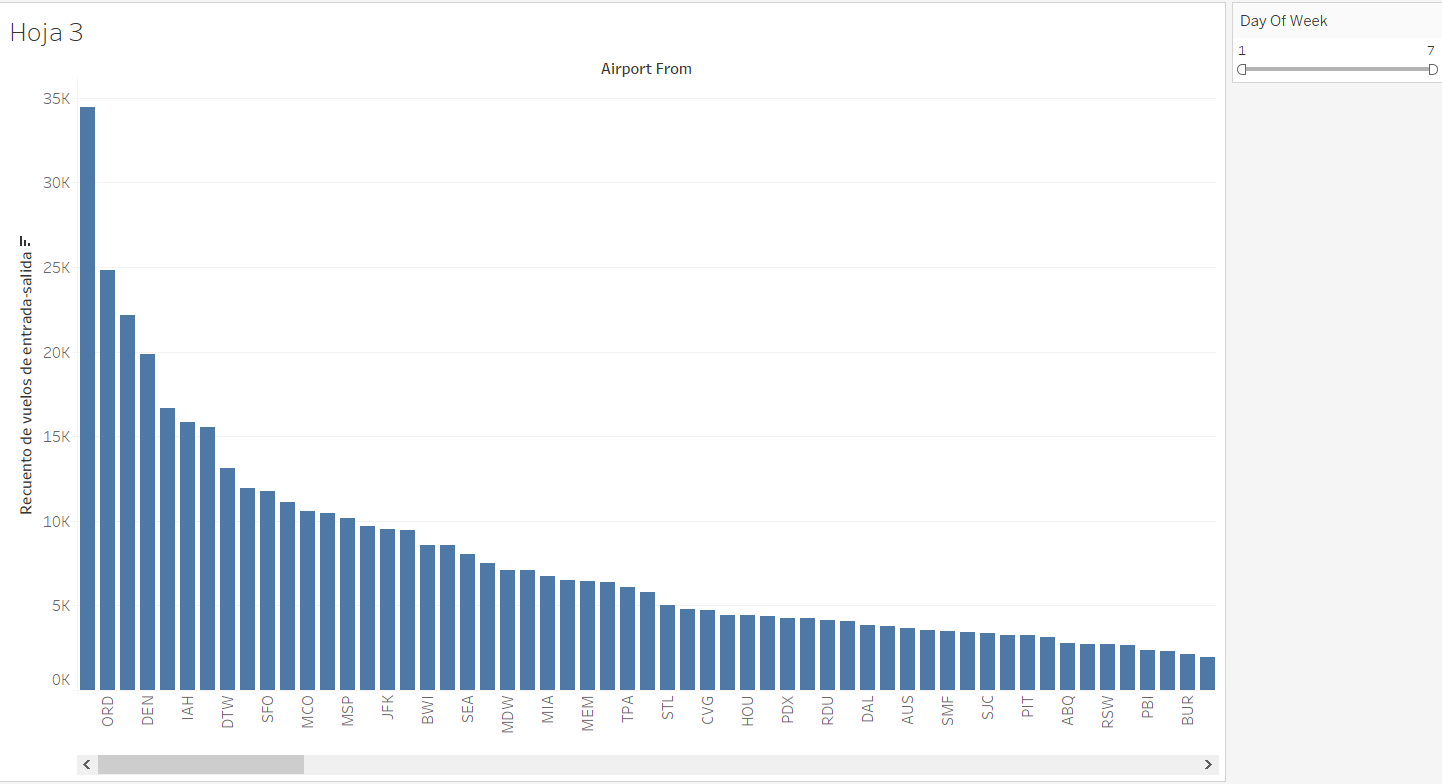

### 3. *Cantidad de horas de retraso por Aerolínea según el día de la semana*

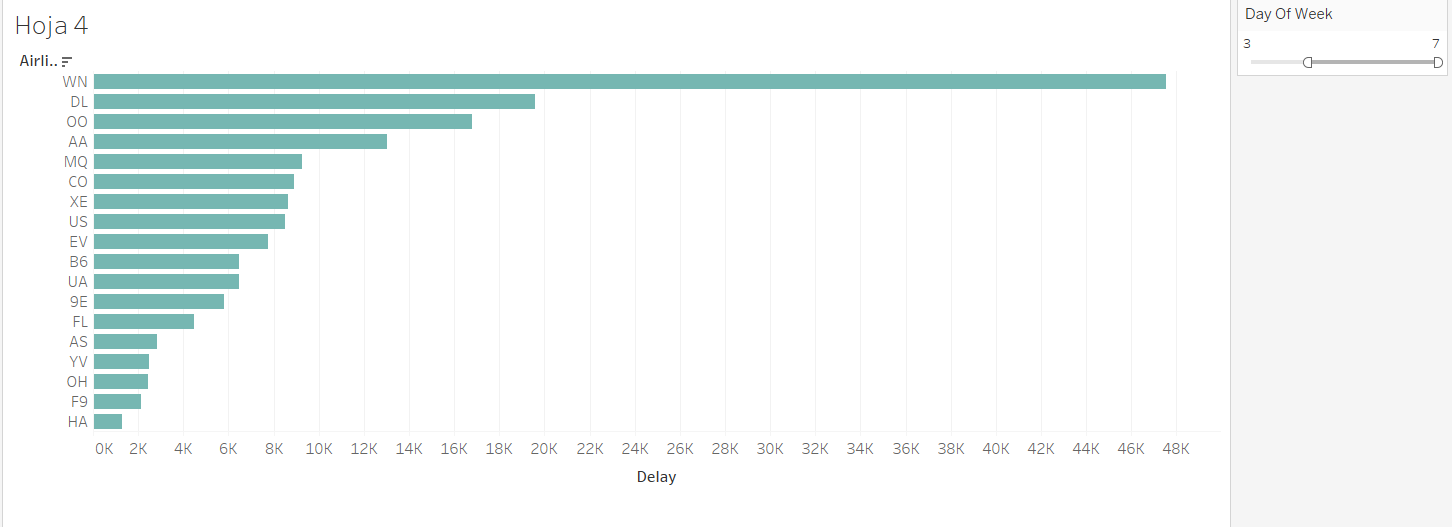